In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import pdb
import matplotlib.pyplot as plt
#import seaborn as sns
from Analysis_Utils import preprocessing_df as preprocessing
from Analysis_Utils import query_df
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
def import_robot_data(df_path):
    df = pd.read_hdf(df_path)
    df = preprocessing(df)
    return df
import ast
df = import_robot_data('default_save.h5')
df = df.reset_index(drop=True)



/home/kallanved/Desktop/Analysis_Utils.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dim'][k] = 3


In [2]:
df = df.reset_index(drop=True)
df['Date'][0]

'18'

In [3]:
# visualize robot data
# get robot experiment data for a single day
# def query_df(df,idx_name, query_subject, set_index=False):
def get_single_trial(df,date,session,rat):
    rr = df.loc[df['Date'] == date]
    rr = rr.loc[rr['S'] == session]
    new_df = rr.loc[rr['rat'] == rat]
    return new_df

dd = get_single_trial(df,'27','S3','RM16')
#dd.head()
# now that I have a single trial, check dtype and visualize...
#plt.plot(dd['r_x'].to_numpy(), dd['r_y'].to_numpy())


In [4]:
ddv1=get_single_trial(df,'25','S3','RM16')
#ddv1.head()
#plt.plot(ddv1['r_z'], ddv1['r_y'])

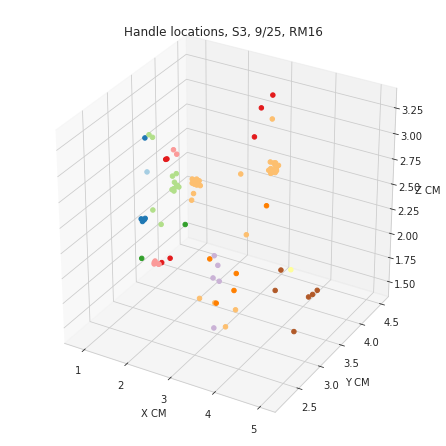

In [5]:
# Have robot trajectories
# check 3-D
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)
g = ax.scatter(ddv1['r_x'].to_numpy()[0],ddv1['r_y'].to_numpy()[0], ddv1['r_z'].to_numpy()[0], c=ddv1['r_x'].to_numpy()[0],
               marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('X CM')
ax.set_ylabel('Y CM')
ax.set_zlabel('Z CM')
plt.title('Handle locations, S3, 9/25, RM16')
plt.savefig('3-D_Handle_locations.png')

In [6]:
x_loc=ddv1['r_x'].to_numpy()
x_loc[0]
trial_start = ddv1['m_start'].to_numpy()
# 11 trialstotal, 66 robot positions (I have no time-stamps I don't think but I have positions)
x_pos = ddv1['x_p'].to_numpy()
len(x_pos[0]) #100
len(x_loc[0]) #85



85

In [7]:
ddv1=get_single_trial(df,'18','S2','RM11')
ddv1.head()

,rat,S,Date,dim,time,m_start,m_stop,SF,t_m,lick,...,x_p,y_p,z_p,x0,y0,z0,moving,RW,r_start,r_stop
42,RM11,S2,18,3,"[20.940833304723128, 20.963833306630477, 21.03...","[162.13383338292442, 168.9688334210714, 177.12...","[165.95683333714805, 172.2078332646688, 181.13...","[0, 1, 3, 9, 13, 14, 17, 18, 19, 23, 24, 27, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 165.62246666666667, 165.6536, 165.8069, ...",...,655.4 916.8 916.8 655.4 655.4 655.4 916.8 655....,794.8 648.8 648.8 449.0 794.8 794.8 648.8 794....,361.6 571.1 571.1 361.6 707.5 707.5 571.1 707....,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 0 4 ...,"[20045, 21010, 22161, 23244, 29243, 30274, 324...","[20586, 21466, 22726, 23747, 29807, 30847, 329..."


In [8]:
# import 3-D data (currently in alpha)
kinematics_df=pd.read_csv('Kinematics_Ex.csv')


In [9]:
def get_handle_data(df):
    b_handle = df.loc[df['name'] == 'B Handle']
    handle = df.loc[df['name'] == 'Handle']
    handle_positions = pd.concat([b_handle,handle])
    return handle_positions, b_handle, handle

handle_positions, b_handle, handle=get_handle_data(kinematics_df)
handle.columns

Index(['Unnamed: 0', 'X', 'Y', 'Z', 'name'], dtype='object')

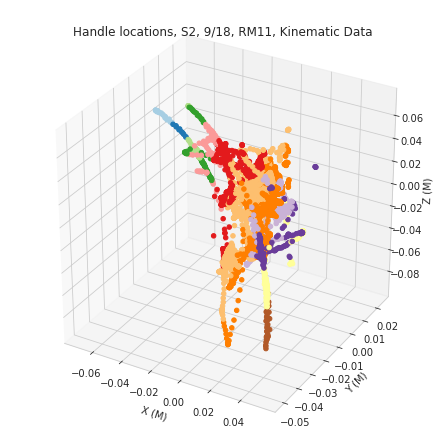

In [10]:
# plot handle positions in 3-D

from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)
g = ax.scatter(handle['X'].to_numpy(),handle['Y'].to_numpy(), handle['Z'].to_numpy(), c=handle['X'].to_numpy(),
               marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('X (M)')
ax.set_ylabel('Y (M)')
ax.set_zlabel('Z (M)')
plt.title('Handle locations, S2, 9/18, RM11, Kinematic Data')
plt.savefig('3-D_Handle_locations_kinematics.png')

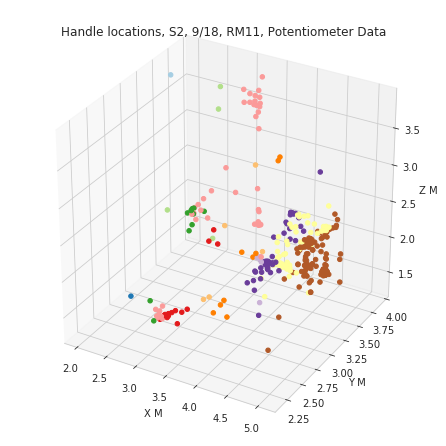

In [11]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)
g = ax.scatter(ddv1['r_x'].to_numpy()[0],ddv1['r_y'].to_numpy()[0], ddv1['r_z'].to_numpy()[0], c=ddv1['r_x'].to_numpy()[0],
               marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('X M')
ax.set_ylabel('Y M')
ax.set_zlabel('Z M')
plt.title('Handle locations, S2, 9/18, RM11, Potentiometer Data')
plt.savefig('3-D_Handle_locations_potentiometer.png')

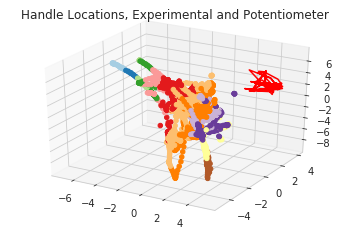

In [12]:
ax = plt.axes(projection='3d')# Data for a three-dimensional line
ax.plot3D(ddv1['r_x'].to_numpy()[0],ddv1['r_y'].to_numpy()[0], ddv1['r_z'].to_numpy()[0],c='r')

ax.scatter(handle['X'].to_numpy()*100,handle['Y'].to_numpy()*100, handle['Z'].to_numpy()*100, c=handle['X'].to_numpy(),
               marker='o', depthshade=False, cmap='Paired')

plt.title('Handle Locations, Experimental and Potentiometer')
plt.savefig('both_handle_location.png')

### OK HERE IT IS, 3-D Reconstruction!


In [13]:
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, 0:num])
        line.set_3d_properties(data[2,0:num])
    return lines


def plotting_3D(df,start,end_time=200,bodyparts=None,plot=True,animate=False,save=False):
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    data_handle = make_plot_df(df.loc[df['name']=='Handle'])
    data_bhandle =  make_plot_df(df.loc[df['name']=='B Handle'])
    data_shoulder = make_plot_df(df.loc[df['name']=='Shoulder 1'])
    data_forearm = make_plot_df(df.loc[df['name']=='Forearm 1'])
    data_palm = make_plot_df(df.loc[df['name']=='Palm 1'])
    data_wrist = make_plot_df(df.loc[df['name']=='Wrist 1'])
    for name in bodyparts:
        globals()['data_'+name] = make_plot_df(df.loc[df['name'] == name])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Test')
    ax.set_xlim3d([-0.05, 0.05])
    ax.set_ylim3d([-0.05, 0.05])
    ax.set_zlim3d([-0.05, 0.05])
    if animate:
        lines_handle = [ax.plot(data_handle[0][0,start:end_time], data_handle[0][1,start:end_time], data_handle[0][2,start:end_time], '*', label = 'Handle')[0]]
        lines_bhandle = [ax.plot(data_bhandle[0][0,start:end_time], data_bhandle[0][1,start:end_time], data_bhandle[0][2,start:end_time], '*', label = 'B Handle')[0]]
        lines_shoulder = [ax.plot(data_shoulder[0][0,start:end_time], data_shoulder[0][1,start:end_time], data_shoulder[0][2,start:end_time], '*', label = 'Shoulder')[0]]
        lines_forearm = [ax.plot(data_forearm[0][0,start:end_time], data_forearm[0][1,start:end_time], data_forearm[0][2,start:end_time], '*', label = 'Forearm')[0]]
        lines_palm = [ax.plot(data_palm[0][0,start:end_time], data_palm[0][1,start:end_time], data_palm[0][2,start:end_time], '*', label = 'Palm')[0]]
        lines_wrist = [ax.plot(data_wrist[0][0,start:end_time], data_wrist[0][1,start:end_time], data_wrist[0][2,start:end_time], '*', label = 'Wrist')[0]]
        leg = ax.legend();
        ani1 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_handle, lines_handle),interval=400, blit=False)
        ani2 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_bhandle, lines_bhandle),interval=400, blit=False)
        #ani3 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_shoulder, lines_shoulder),interval=400, blit=False)
        #ani4 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_forearm, lines_forearm),interval=400, blit=False)
        ani5 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_palm, lines_palm),interval=400, blit=False)
        #ani6 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_palm, lines_wrist),interval=400, blit=False)
    if plot:
        ax.scatter(data_handle[0][0,start:end_time], data_handle[0][1,start:end_time], data_handle[0][2,start:end_time], '*', label = 'Handle')
        ax.scatter(data_bhandle[0][0,start:end_time], data_bhandle[0][1,start:end_time], data_bhandle[0][2,start:end_time], '*', label = 'B Handle')
        #ax.scatter(data_shoulder[0][0,start:end_time], data_shoulder[0][1,start:end_time], data_shoulder[0][2,start:end_time], '*', label = 'Shoulder')
        #ax.scatter(data_forearm[0][0,start:end_time], data_forearm[0][1,start:end_time], data_forearm[0][2,start:end_time], '*', label = 'Forearm')
        #ax.scatter(data_palm[0][0,start:end_time], data_palm[0][1,start:end_time], data_palm[0][2,start:end_time], '*', label = 'Palm')
        ax.scatter(data_wrist[0][0,start:end_time], data_wrist[0][1,start:end_time], data_wrist[0][2,start:end_time], '*', label = 'Wrist')
        ax.legend()
    if save:
        plt.savefig(save)
    plt.show()
    return


def make_plot_df(df):
    x, y, z = df["X"], df["Y"], df["Z"]
    handle_h = np.vstack((x, y, z))
    data_handle = [handle_h]
    return data_handle


def clip_df(df,start,stop):
    clipped_df=df[start:stop]
    return clipped_df


def load_experiment(bodyparts,times,start,stop,succ_trials,scorer,rat,date,session,dim, path = False):
    mask = trial_mask(times,start,stop,succ_trials)
    df = make_big_df(times,bodyparts,start,stop,mask,scorer,date,session, path,dim)
    return df


def make_big_df(times,bodyparts,start,stop,mask,scorer,date,session,trial,dim,path=False,dataframe=False):
    for i,j in enumerate(bodyparts):
        part_name=str(bodyparts[i])
        print(part_name+' is being added..')
        t=load_all_trials(bodyparts[i],path)
        list_of_df = find_all_trial_data(times,t,start,stop,mask,part_name,scorer,rat,date,session,dim)
        if i == 0:
            main_df = list_of_df
        else:
            main_df = pd.concat([main_df,list_of_df], axis=1)
    print('Finished!')
    return main_df


def load_all_trials(bodypart,file_path=False):
    if file_path:
        os.chdir(file_path)
    all_trials=pd.read_csv(bodypart+'.csv',header=None)
    return all_trials


def trial_mask(matched_times,r_i_start,r_i_stop,s_t):
    new_times=np.zeros(len(matched_times[0]))
    for i, j in zip (range(0,len(r_i_start)-1),range(0,len(r_i_stop)-1)):
        ix=int(r_i_start[i])
        jx=int(r_i_stop[i])
        if any (i == s_t):
            new_times[ix:jx]=2
        else:
            new_times[ix:jx]=1
    return new_times


def find_all_trial_data(times,part_file,trial_mask_start,trial_mask_stop,mask,part,scorer,rat,date,session,dim):
    for i in range(0,len(trial_mask_start)-1):
        i_x = int(trial_mask_start[i])
        j_x = int(trial_mask_stop[i])
        val=mask[i_x]
        if val ==1:
            trial = 'Fail'
        if val == 2: 
            trial = 'Success'
        trial_array = part_file[i_x:j_x]
        times=np.asarray(times)
        time_start=(times[i_x])
        time_stop=(times[j_x])
        total=float(time_stop-time_start)
        time_list=[time_start,time_stop,total]
        new_trial=np.asarray(trial_array)
        c = pd.MultiIndex.from_product([[scorer],[rat],[date],[session],[dim],[i],[part],[trial],
                                        [total],['x','y','z']],
            names=['Scorer','Rat','Date','Session','trial_dim','trials','Bodypart','S/F','exp_times','coords'])
        new_df = pd.DataFrame(new_trial,columns=c)
        new_df.keys
        if i == 0:
            trial_dataframe = new_df
        else:
            trial_dataframe=pd.concat([trial_dataframe,new_df],axis=1)
    return trial_dataframe


def fetch_levels(df,num_level,fetch_what):
    c = df.loc[:,df.columns.get_level_values(num_level).isin(fetch_what)]
    return c


def fetch_items(df,level_fetch,level_list):
    for x,y in enumerate(level_list):
        fetch=level_fetch[x]

        if x ==0:
            c=fetch_levels(df,fetch,y) 
        else:
            c=fetch_levels(c,fetch,y)
    return c


def scatter_3d(df,bodyparts, colors, elev=90, azim=90):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    %matplotlib notebook
    
    fig = plt.figure()
    ax = Axes3D(fig)
    count = 0
    for i in bodyparts:
        x_val = df[i]['x'].values
        y_val = df[i]['y'].values
        z_val = df[i]['z'].values
        color = colors_2[count]
        ax.scatter(x_val,y_val,zs=z_val, s=10, c = color)
        count += 1
        ax.scatter(x_val,y_val,z_val, s=10)
        
    ax.set_xlabel('x-position (meters)')
    ax.set_ylabel('y-position (meters)')
    ax.set_zlabel('z-position (meters)')
    
    plt.title('Rat Handle Reach');

    ax.view_init(elev,azim)
    plt.draw()
    return


def get_moving_frames(df):
    moving=df['moving'].values[0]
    robot_start=[]
    robot_stop=[]
    for i, j in enumerate(moving):
        if i == 0:
            continue
        if j == 1:
            if moving[i-1]==0:
                robot_start.append(i)
            else:
                continue
        elif j == 0:
            if moving[i-1] == 1:
                robot_stop.append(i)
            else:
                continue
    return robot_start,robot_stop


def get_robot_kinematic_data_slices(bodyparts, kinematics_df, start,stop):
    kin_list = []
    for ix, name in enumerate(bodyparts):
        name_df = kinematics_df.loc[kinematics_df['name']== name].to_numpy()
        for jx,xi in enumerate(start):
            name_array = name_df[start[2]:stop[2],:]
            kin_list.append(name_array)
    return kin_list
        
        
def get_robot_position_df(df):
    robot_df = [df['r_x'].to_numpy(),df['r_y'].to_numpy(),df['r_z'].to_numpy()]
    return robot_df




In [14]:
#plotting_3D(kinematics_df)

trial_masks = trial_mask(ddv1['time'].to_numpy(),ddv1['m_start'].to_numpy(),ddv1['m_stop'].to_numpy(),ddv1['SF'].to_numpy())
# 1 is fail, 2 is succ
succ_index = np.nonzero(trial_mask == 2)

succ_start = []
succ_stop = []
for i in ddv1['SF']:
    succ_start.append( ddv1['m_start'][i].to_numpy() )
    succ_stop.append( ddv1['m_stop'][i].to_numpy())
# get successful trial block

block = ddv1['SF'].values # take 1st element
#block=np.asarray(block)
block=block[0]
block=int(block[3])

#print(start,stop)
plotting_3D(kinematics_df,int(start[0][block])-100,int(stop[0][block])+100,
            bodyparts=['Handle', 'B Handle', 'Shoulder 1', 'Forearm 1', 'Wrist 1', 'Palm 1'],save='almost_there.png')


KeyError: "None of [Int64Index([0, 1, 3, 9, 13, 14, 17, 18, 19, 23, 24, 27, 28, 31, 32], dtype='int64')] are in the [index]"

In [15]:
start=ddv1['r_start'].values
stop=ddv1['r_stop'].values
movingstart,movingstop = get_moving_frames(ddv1)

bodyparts=['Handle','B Handle']

kin_list=get_robot_kinematic_data_slices(bodyparts,kinematics_df,movingstart,movingstop)
robot_list=get_robot_position_df(ddv1)

In [16]:
len(kin_list)
kin_list[20]
def make_kin_array(kin_list):
    for count,value in enumerate(kin_list):
        if count == 0:
            a=value
        b=value
        c=np.concatenate([a,b],axis=0)
    return c
    
        
d=make_kin_array(kin_list)
d.shape
d

def make_handle_df(d_array):
    a_len = int(len(d)/2)
    d_array=np.delete(d_array,0,1)
    d_array=np.delete(d_array,3,1)
    handle_array=d_array[0:a_len,:]
    b_handle_array = d_array[a_len:,:]
    return handle_array,b_handle_array

h_a,bh_a = make_handle_df(d)
h_a[0:1,:][0]

array([-0.0063, -0.016, -0.0406], dtype=object)

In [ ]:
haaa=h_a[:,:]

In [19]:
# robot fitting code
#credit Nklas Hambuchen/StackExchange 

import numpy as np
import numpy.linalg
# Adapted Brett Nelson 8/12/2020 for use w/ NSDS Lab

# Relevant links:
#   - http://stackoverflow.com/a/32244818/263061 (solution with scale)
#   - "Least-Squares Rigid Motion Using SVD" (no scale but easy proofs and explains how weights could be added)


# Rigidly (+scale) aligns two point clouds with know point-to-point correspondences
# with least-squares error.
# Returns (scale factor c, rotation matrix R, translation vector t) such that
#   Q = P*cR + t
# if they align perfectly, or such that
#   SUM over point i ( | P_i*cR + t - Q_i |^2 )
# is minimised if they don't align perfectly.
def umeyama(P, Q):
    assert P.shape == Q.shape
    n, dim = P.shape

    centeredP = P - P.mean(axis=0)
    centeredQ = Q - Q.mean(axis=0)

    C = np.dot(np.transpose(centeredP), centeredQ) / n

    V, S, W = np.linalg.svd(C)
    d = (np.linalg.det(V) * np.linalg.det(W)) < 0.0

    if d:
        S[-1] = -S[-1]
        V[:, -1] = -V[:, -1]

    R = np.dot(V, W)

    varP = np.var(P, axis=0).sum()
    c = 1/varP * np.sum(S) # scale factor

    t = Q.mean(axis=0) - P.mean(axis=0).dot(c*R)

    return c, R, t


# Testing

np.set_printoptions(precision=3)
def unit_test():
    a1 = np.array([
      [0, 0, -1],
      [0, 0, 0],
      [0, 0, 1],
      [0, 1, 0],
      [1, 0, 0],
    ])

    a2 = np.array([
      [0, 0, 1],
      [0, 0, 0],
      [0, 0, -1],
      [0, 1, 0],
      [-1, 0, 0],
    ])
    a2 *= 2 # for testing the scale calculation
    a2 += 3 # for testing the translation calculation


    c, R, t = umeyama(a1, a2)
    print ("R =\n", R)
    print ("c =", c)
    print ("t =\n", t)
    print ("Check:  a1*cR + t = a2  is", np.allclose(a1.dot(c*R) + t, a2))
    err = ((a1.dot(c * R) + t - a2) ** 2).sum()
    print ("Residual error", err)
    return R,t


# We need kinematic and robot coordinates in following
# ak = [x1,y1,z1],[x2,y2,z2]
# ar = [x2,y2,z2],...
def real_test(a1,a2):
    c, R, t = umeyama(a1, a2)
    print ("R =\n", R)
    print ("c =", c)
    print ("t =\n", t)
    print ("Check:  a1*cR + t = a2  is", np.allclose(a1.dot(c*R) + t, a2))
    err = ((a1.dot(c * R) + t - a2) ** 2).sum()
    print ("Residual error", err)
    return R,t
h_a=h_a.astype(float)
bh_a=bh_a.astype(float)
R,t = real_test(h_a,robot_array)

AssertionError: 

In [21]:
robot_list[0][0].shape

robot_x=robot_list[0][0][0::3]
robot_y=robot_list[0][0][1::3]
robot_z=robot_list[0][0][2::3]

robot_array=np.concatenate((robot_x[:-1].reshape(-1,1),robot_y.reshape(-1,1),robot_z.reshape(-1,1)),axis=1)
robot_array


array([[5.017, 4.902, 4.717],
       [4.588, 5.021, 4.976],
       [4.74 , 4.618, 4.514],
       [4.421, 5.013, 3.856],
       [2.475, 3.43 , 3.189],
       [3.311, 3.211, 5.013],
       [4.673, 4.503, 4.362],
       [4.451, 4.551, 4.436],
       [4.51 , 4.396, 4.466],
       [4.555, 4.436, 4.51 ],
       [4.396, 4.462, 4.536],
       [4.399, 5.017, 3.726],
       [2.745, 5.017, 4.762],
       [4.285, 3.815, 2.901],
       [3.341, 3.285, 3.237],
       [3.234, 3.174, 3.237],
       [3.2  , 3.252, 3.211],
       [5.021, 4.569, 4.381],
       [5.013, 3.567, 3.041],
       [3.134, 3.23 , 3.115],
       [3.141, 3.178, 3.208],
       [3.038, 2.989, 5.017],
       [5.002, 4.95 , 5.013],
       [5.013, 5.017, 5.021],
       [5.017, 5.021, 5.017],
       [5.013, 5.013, 5.017],
       [5.017, 5.017, 5.017],
       [5.017, 5.058, 5.021],
       [5.021, 5.017, 5.017],
       [5.017, 5.013, 5.013],
       [5.01 , 5.013, 5.013],
       [5.01 , 5.006, 5.006],
       [5.006, 5.002, 5.002],
       [5.

In [22]:
print(robot_x.shape,robot_y.shape,robot_z.shape)

(139,) (138,) (138,)


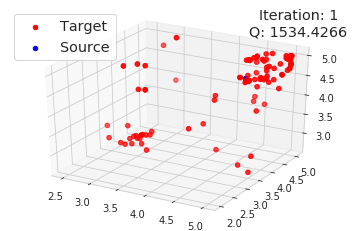

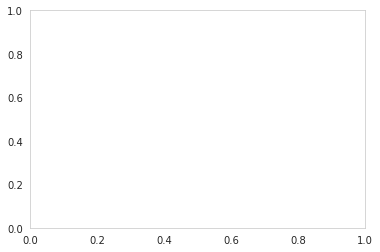

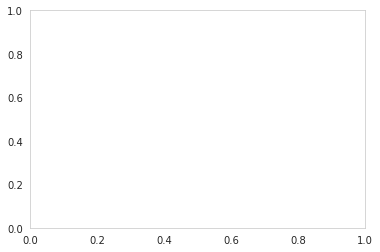

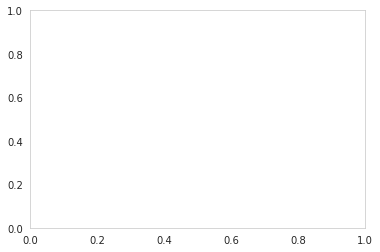

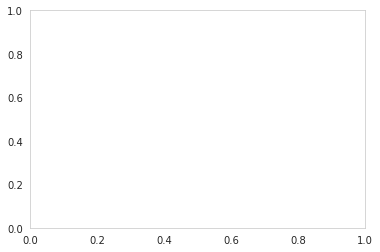

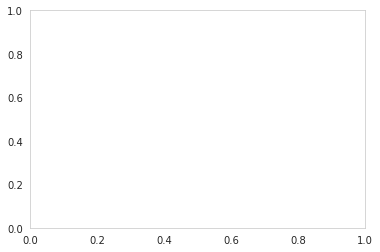

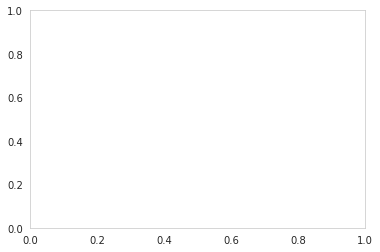

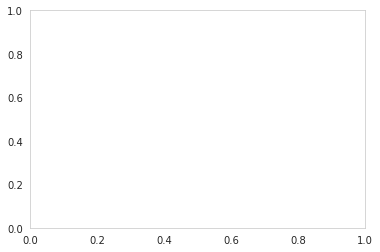

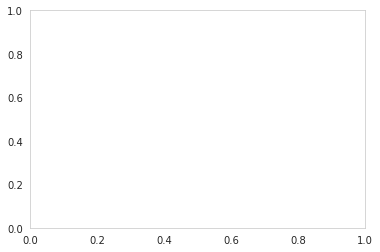

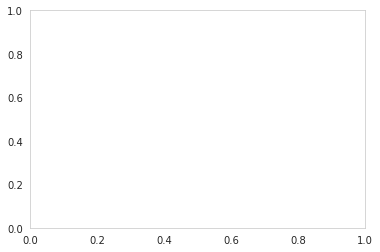

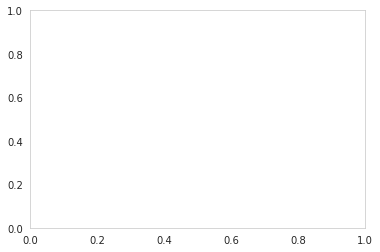

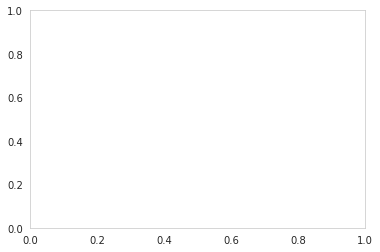

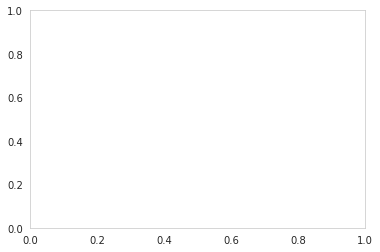

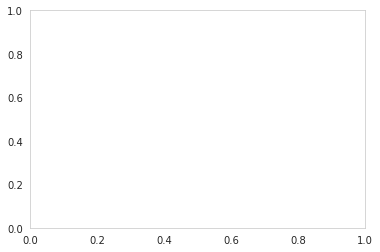

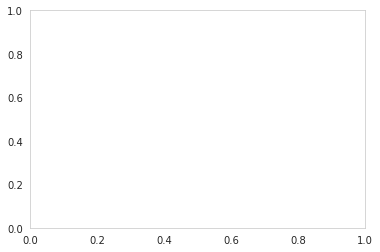

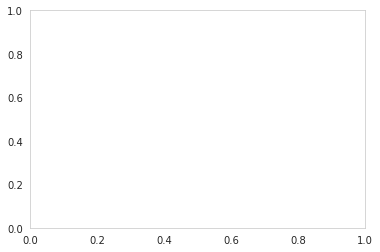

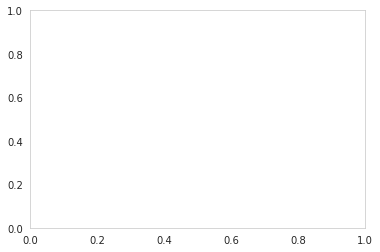

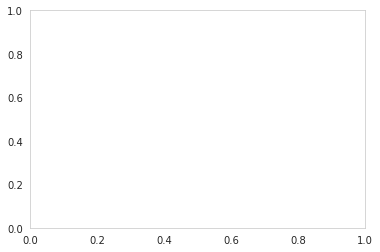

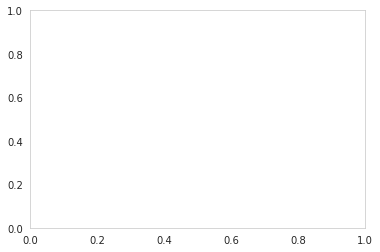

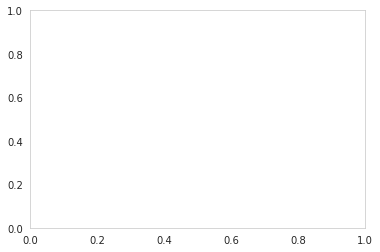

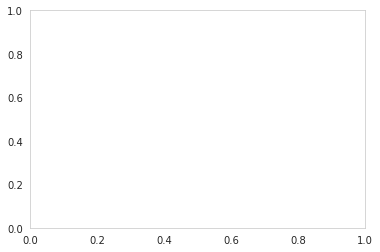

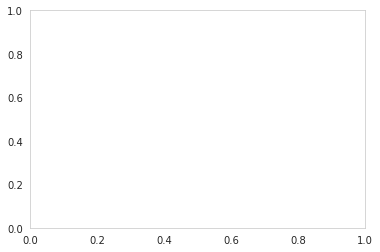

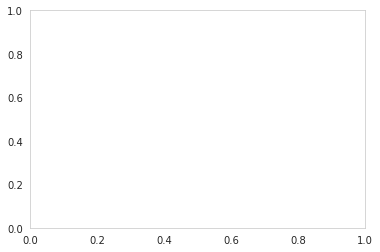

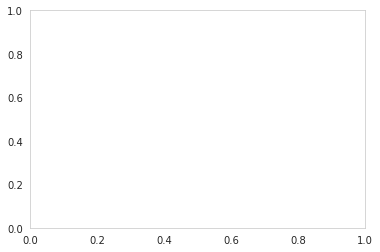

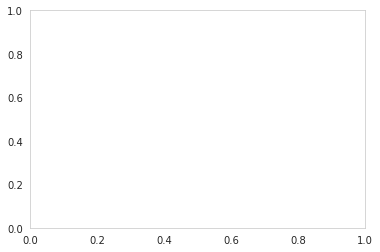

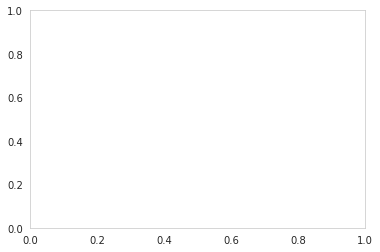

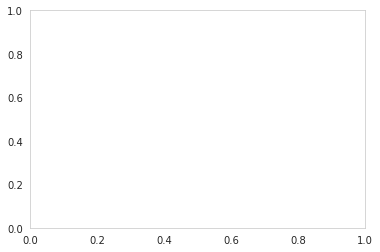

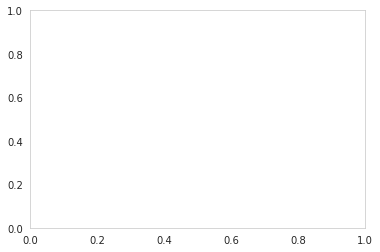

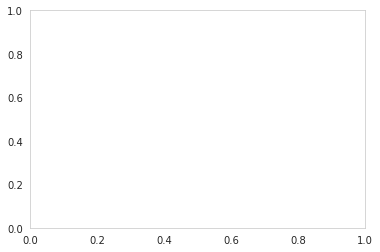

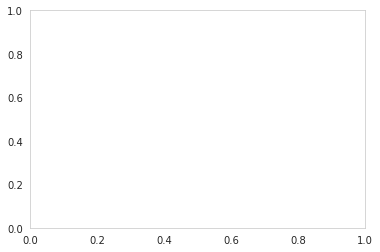

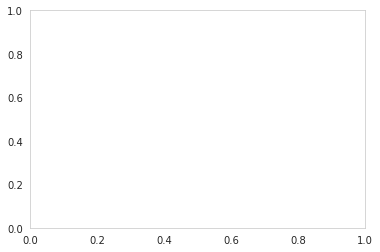

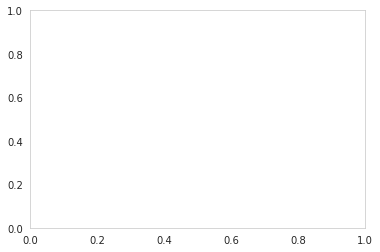

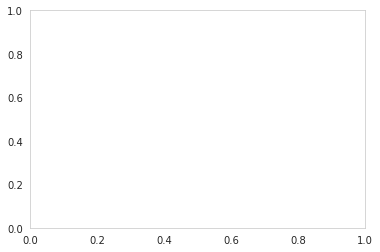

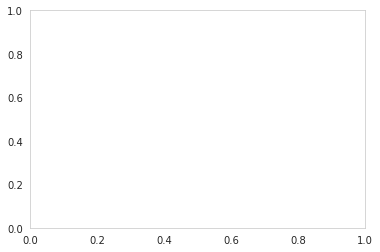

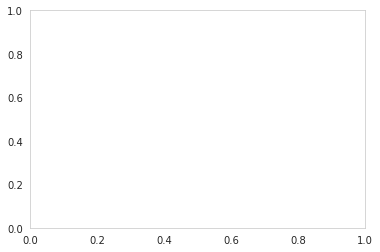

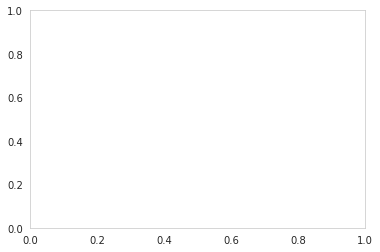

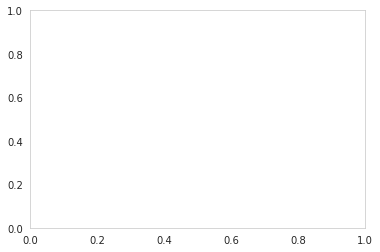

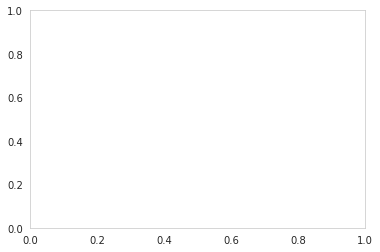

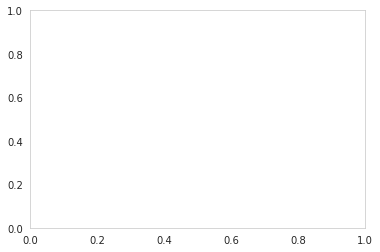

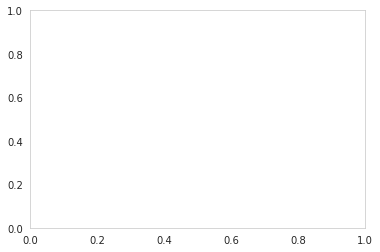

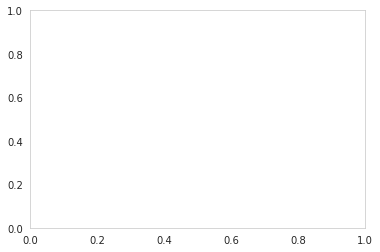

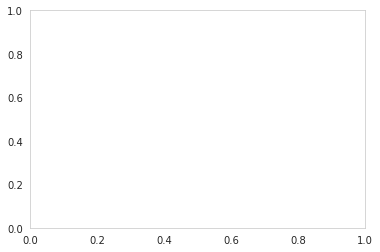

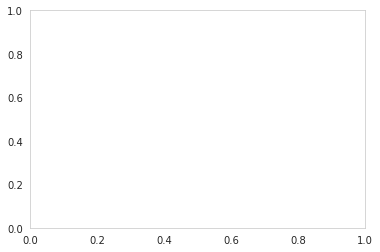

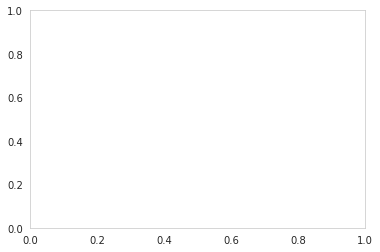

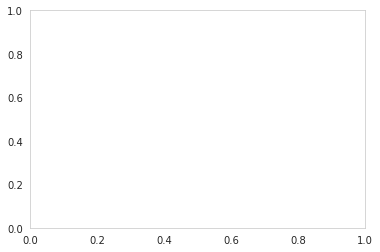

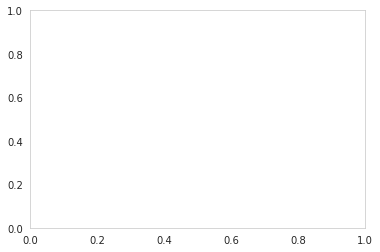

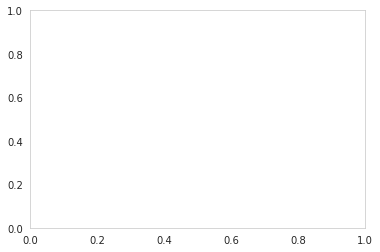

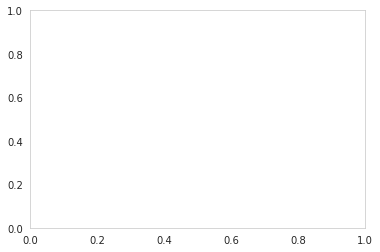

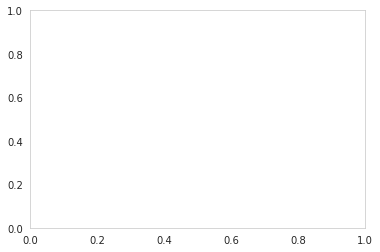

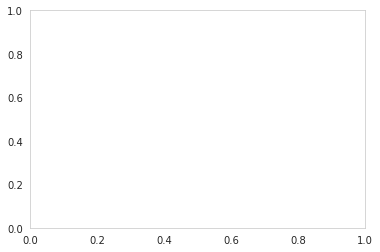

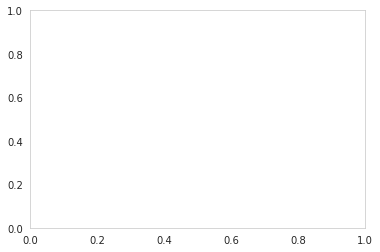

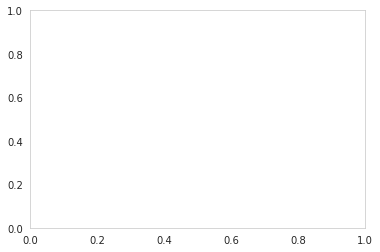

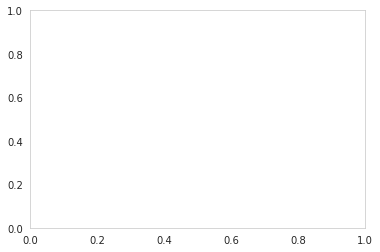

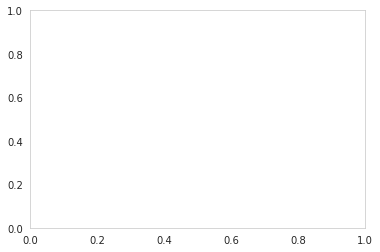

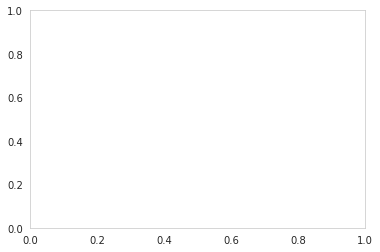

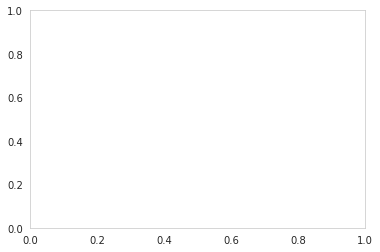

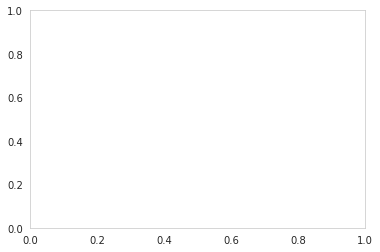

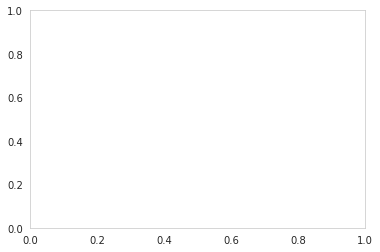

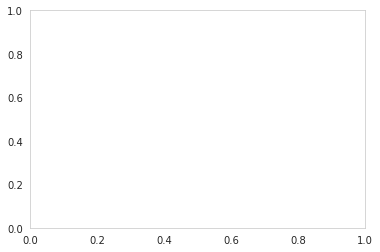

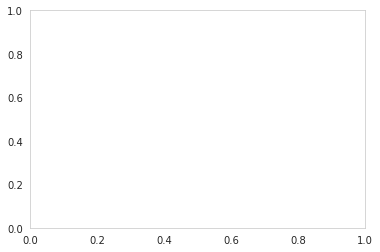

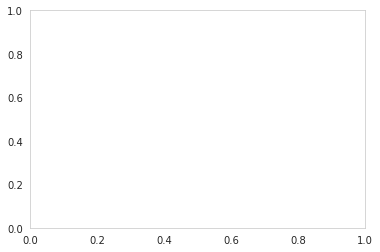

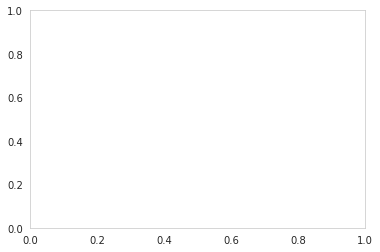

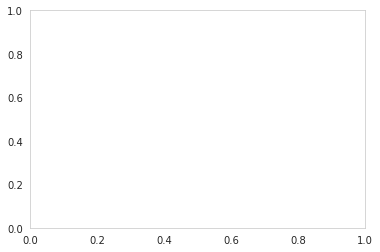

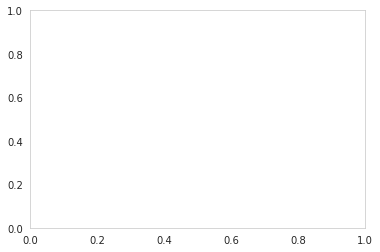

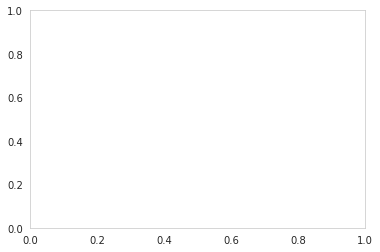

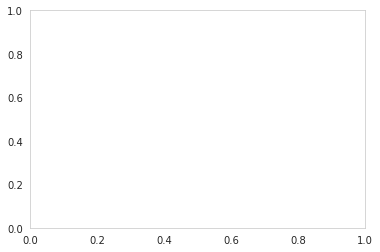

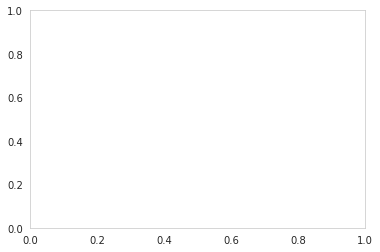

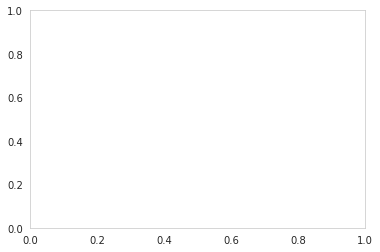

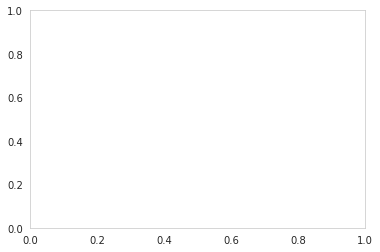

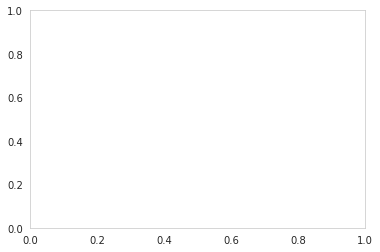

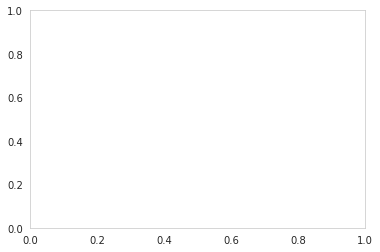

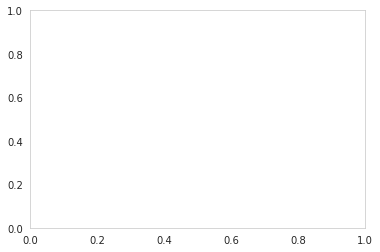

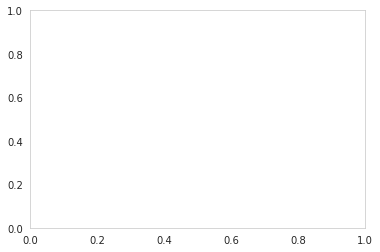

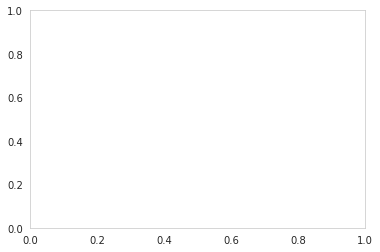

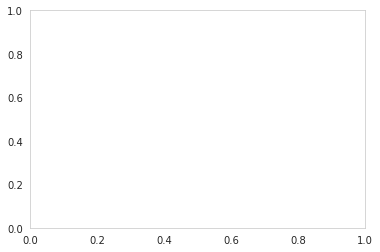

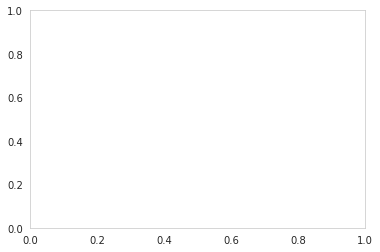

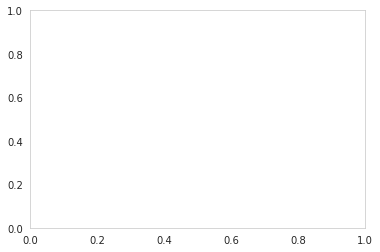

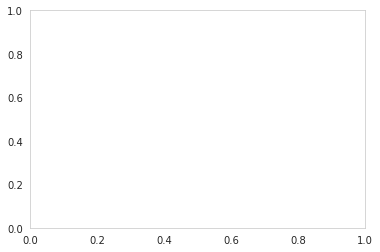

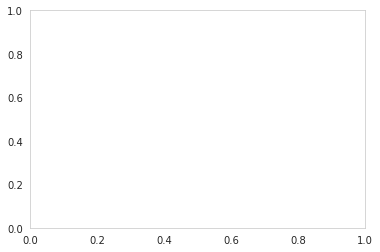

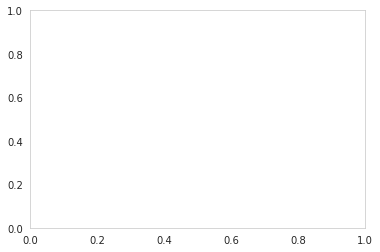

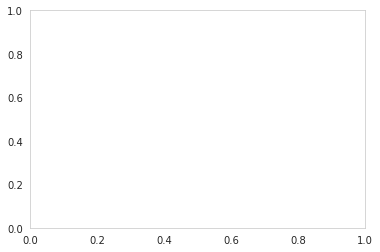

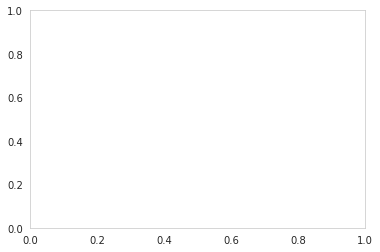

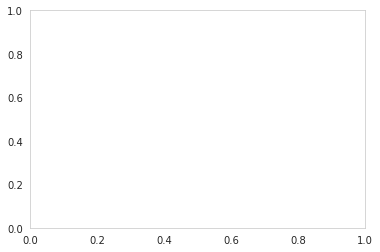

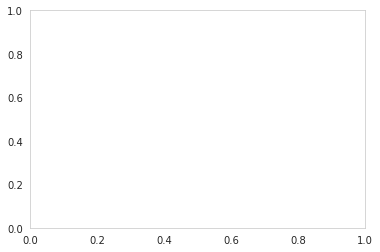

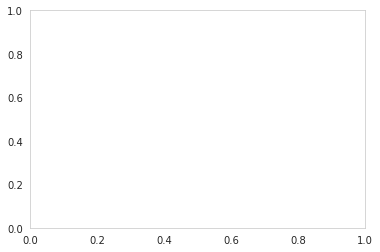

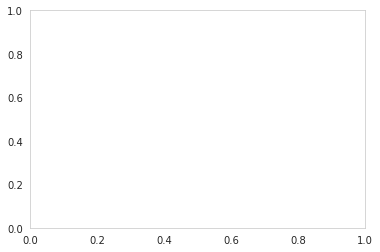

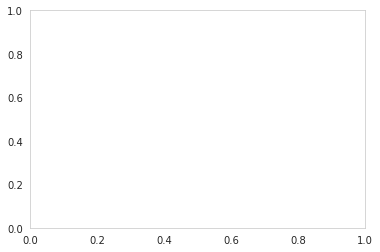

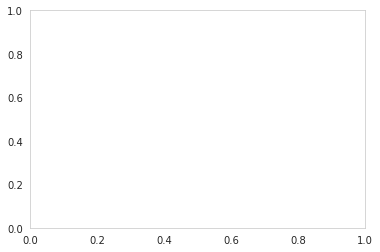

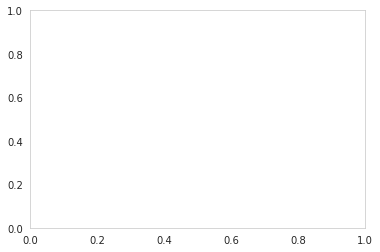

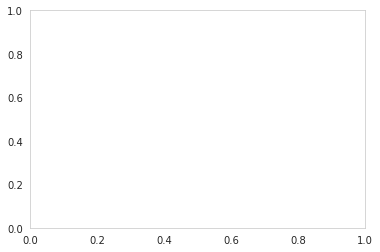

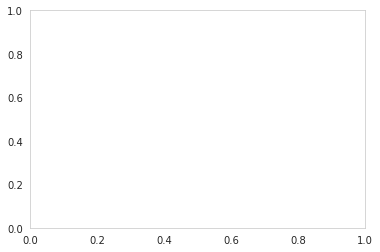

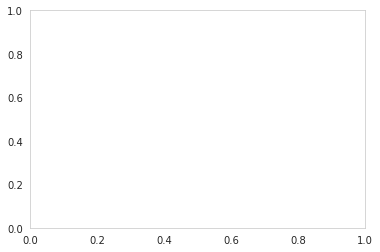

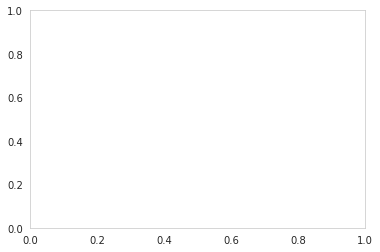

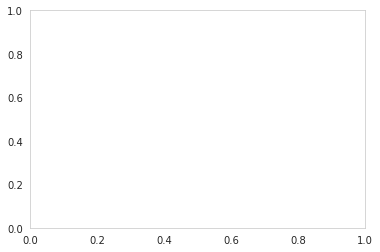

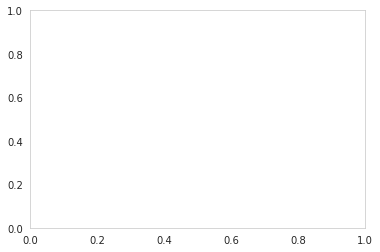

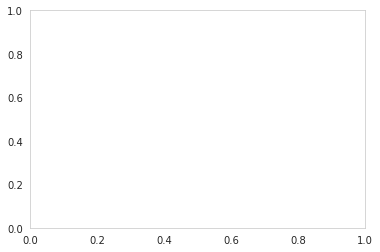

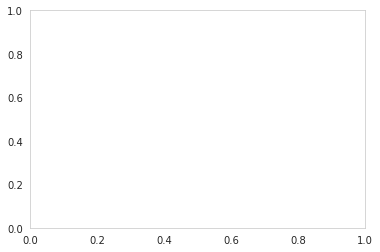

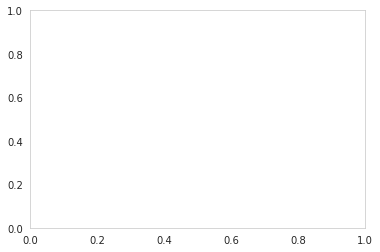

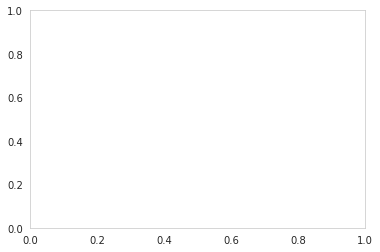

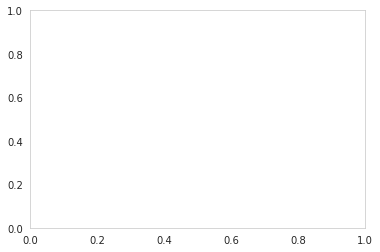

In [23]:
from pycpd import AffineRegistration
from functools import partial
def visualize(iteration, error, X, Y, ax):
    plt.cla()
    ax.scatter(X[:, 0],  X[:, 1], X[:, 2], color='red', label='Target')
    ax.scatter(Y[:, 0],  Y[:, 1], Y[:, 2], color='blue', label='Source')
    ax.text2D(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
        iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
    ax.legend(loc='upper left', fontsize='x-large')
    plt.draw()
    plt.pause(0.001)
    

X1 = np.zeros((robot_array.shape[0], robot_array.shape[1] + 1))
X1[:, :-1] = robot_array
X2 = np.ones((robot_array.shape[0], robot_array.shape[1] + 1))
X2[:, :-1] = robot_array
X = np.vstack((X1, X2))

Y1 = np.zeros((h_a.shape[0], h_a.shape[1] + 1))
Y1[:, :-1] = h_a
Y2 = np.ones((h_a.shape[0], h_a.shape[1] + 1))
Y2[:, :-1] = h_a
Y = np.vstack((Y1, Y2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
callback = partial(visualize, ax=ax)

reg = AffineRegistration(**{'X': X, 'Y': Y})
reg.register(callback)
plt.show()


In [ ]:
B,t=reg.get_registration_parameters()
B,t

In [ ]:
def run_cloud(X,Y,iterations):
    for i in iterations:
        reg = AffineRegistration(**{'X': X, 'Y': Y})
        reg.register(callback)
        plt.show()
        B,t=reg.get_registration_parameters()
        print(B,t)
        